[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4838
[LightGBM] [Info] Number of data points in the train set: 342860, number of used features: 24
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4841
[LightGBM] [Info] Number of data points in the train set: 228573, number of used features: 24
[LightGBM] [Info] Start training from score -1.609451
[LightGBM] [Info] Start training from score -1.609451
[LightGBM] [Info] Start training from score -1.609429
[LightGBM] [Info] Start training from score -1.609429
[LightGBM] [Info] Start training from score -1.609429
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4837
[LightGBM] [Info] Number of data points in the train set: 228573, number of used features: 24
[LightGBM] [Info] Start training from score -1.609429
[LightGBM] [Info] Start training from score -1.609429
[LightGBM] [Info] Start training from scor

C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:08:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:08:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:08:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔥 Stacked Model Accuracy: 0.9122

💌 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     16953
           1       0.87      0.88      0.88     17064
           2       0.91      0.88      0.89     17006
           3       0.96      0.92      0.94     17392
           4       0.94      0.96      0.95     17110

    accuracy                           0.91     85525
   macro avg       0.91      0.91      0.91     85525
weighted avg       0.91      0.91      0.91     85525



C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128152 (\N{HEART WITH ARROW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128139 (\N{KISS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


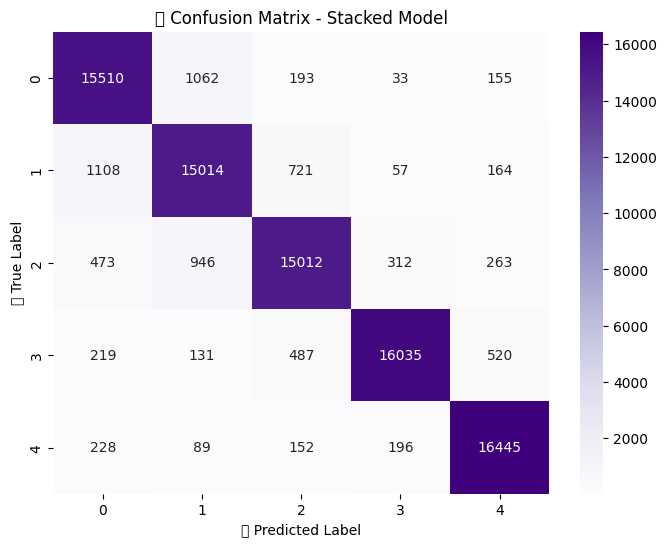

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset.csv")

# Drop rows with NaN in the target column (last column)
df = df.dropna(subset=[df.columns[-1]])

# Features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#  Fixing class imbalance using quantile-based binning
num_bins = 5
y = pd.qcut(y, q=num_bins, labels=range(num_bins), duplicates='drop')

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚿 Clean column names (remove special characters)
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# 🌟 Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 🌟 Base models
base_models = [
    ("lightgbm", lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("xgboost", XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Simpler meta model
meta_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Faster stacking model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)

# 🔥 Train the stacked model on the SMOTE resampled data
stacked_model.fit(X_train_smote, y_train_smote)

# 💫 Make predictions
stacked_pred = stacked_model.predict(X_test)

#  Evaluation
stacked_acc = accuracy_score(y_test, stacked_pred)
print(f"🔥 Stacked Model Accuracy: {stacked_acc:.4f}")
print("\n Classification Report:\n")
print(classification_report(y_test, stacked_pred))

#  Get the confusion matrix
cm = confusion_matrix(y_test, stacked_pred)

#  Plot it pretty
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=range(5), yticklabels=range(5))
plt.title(" Confusion Matrix - Stacked Model")
plt.xlabel(" Predicted Label")
plt.ylabel(" True Label")
plt.show()
